# Slide 5.3: Seaborn

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
print('Khai báo thư viện thành công')

Khai báo thư viện thành công


In [4]:
#Nhập dữ liệu
tips = sns.load_dataset('tips') #Dữ liệu tiền tip cho nhân viên tại 1 nhà hàng
display(tips)

air = sns.load_dataset('flights') #Dữ liệu về các chuyến bay
display(air)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [64]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## Seaborn vs Matplotlib

### Scatter plot

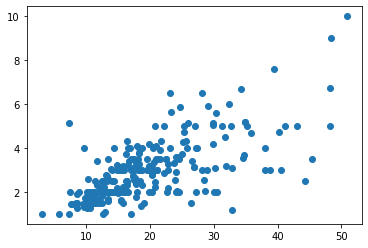

In [63]:
# Matplotlib
# Vẽ biều đồ điểm trục X là số total_bill, Y là tip
plt.scatter(tips['total_bill'], tips['tip']);

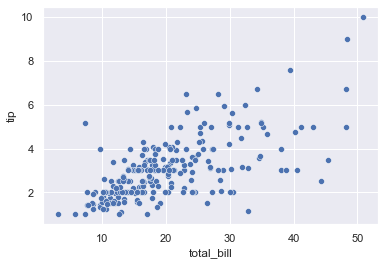

In [73]:
# Seaborn
# sns.scatterplot(x=df['tên cột 1'], y=df['tên cột 2'])
# sns.scatterplot(data= df, x='tên cột 1', y='tên cột 2')
sns.set(style="darkgrid", palette="deep")
sns.scatterplot(data = tips, x='total_bill', y='tip');

### Line plot

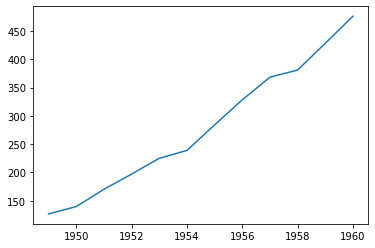

In [68]:
# Matplotlib
# Vẽ biểu đồ đường số lượng khách trung bình mỗi tháng theo năm
air2 = air.groupby('year')['passengers'].mean()
# display(air2)
plt.plot(air2.index, air2);

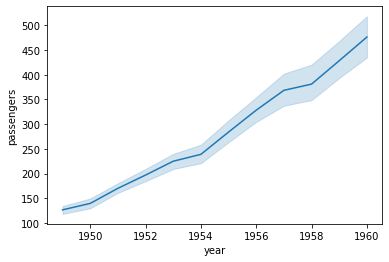

In [67]:
# Seaborn
# sns.lineplot(data = df, x = 'tên cột 1', y = 'tên cột 2', estimator = 'phép toán')
sns.lineplot(data = air, x='year', y='passengers', estimator='mean');

### Pie chart

day
Thur    1096.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64

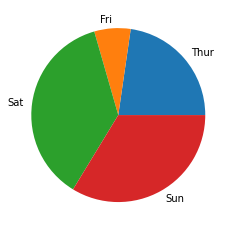

In [54]:
# Matplotlib
# Vẽ biểu đồ tròn tính % thu nhập theo ngày (thứ)
temp = tips.groupby('day')['total_bill'].sum()
display(temp)
plt.pie(temp, labels = temp.index);

In [55]:
# Seaborn
# Không có chức năng vẽ biểu đồ pie

In [69]:
# Biểu đồ cột
# plt.bar()
# sns.barplot()

# Biểu đồ histogram
# plt.histogram()
# sns.histplot()

## Biểu đồ xu hướng (linear regression)

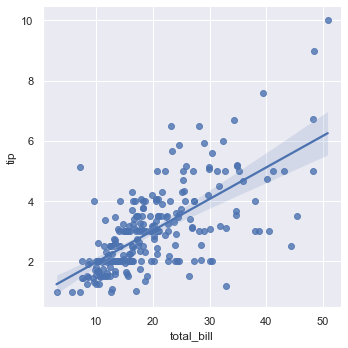

In [76]:
# sns.lmplot(data=df, x='..', y='...')
# Biều đồ xu hướng lượng tiền tip theo tổng hóa đơn
sns.lmplot(x="total_bill", y="tip", data=tips) ;

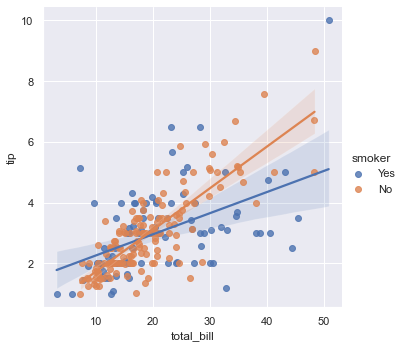

In [79]:
# sns.lmplot(data=df, x='..', y='...', hue='cột phân nhóm')
# Phân nhóm theo hút thuốc hay không
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data=tips) ;

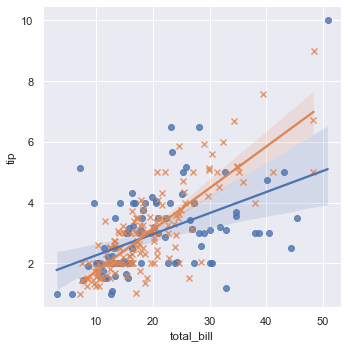

In [85]:
# sns.lmplot(data=df, x='..', y='...', hue='cột phân nhóm')
# Phân nhóm theo giới tính
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', markers = ['o', 'x'], legend = False, data=tips);

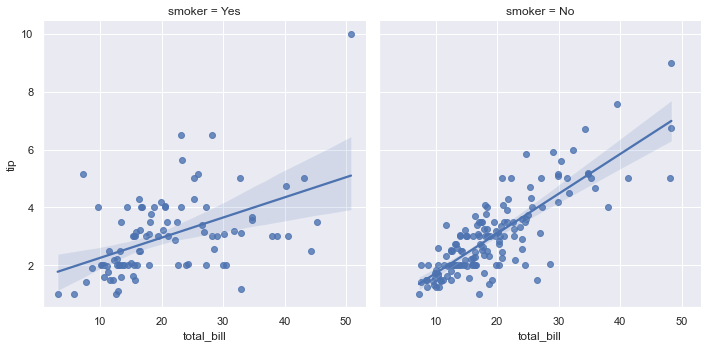

In [86]:
#Tách ra 2 biểu đồ con
sns.lmplot(x="total_bill", y="tip", col = 'smoker', legend = True, data=tips);

## Biểu đồ violin

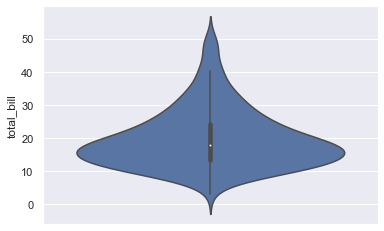

In [90]:
#Cú pháp sns.violinplot(y=df['ten cot'])
# sns.violinplot(data = df, y='ten cot')
# sns.violinplot(y = tips["total_bill"], palette="deep") ;
sns.violinplot(data=tips, y='total_bill');

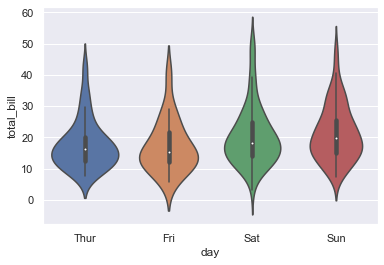

In [91]:
#Tách nhóm theo trục X, (tách 1 violin thành 4 violin)
# sns.violinplot(data = df, y='ten cot', x = 'ten cot phan nhom')
sns.violinplot(data=tips, y='total_bill', x = 'day');

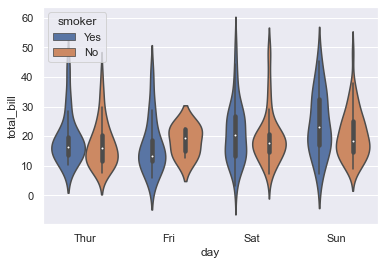

In [96]:
#Tách nhóm theo trục X, tiếp tục phân nhóm theo smoker (tách 1 violin thành 2 violin)
# sns.violinplot(data = df, y='ten cot', x = 'ten cot phan nhom')
sns.violinplot(data=tips, y='total_bill', x = 'day', hue = 'smoker');

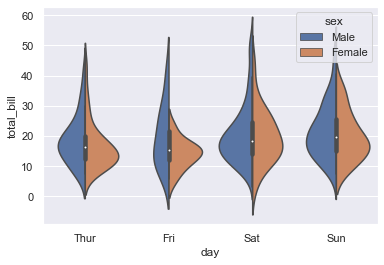

In [108]:
#Tách nhóm theo trục X, tiếp tục phân nhóm theo smoker (tách 1 violin thành 2 violin), ghép 2 nửa
# sns.violinplot(data = df, y='ten cot', x = 'ten cot phan nhom', hue = 'ten cot phan nhom 2', split = True)
sns.violinplot(data=tips, y='total_bill', x = 'day', hue = 'sex', split = True);

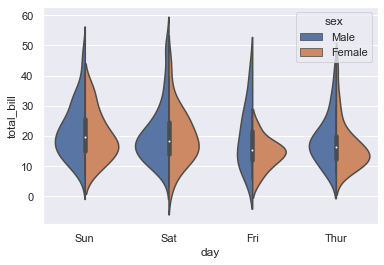

In [107]:
#Tách nhóm theo trục X, theo 'day', sắp xếp thứ tự
# sns.violinplot(data = df, y='ten cot', x = 'ten cot phan nhom', hue = 'ten cot phan nhom 2', order = [tt1, tt2, tt3, ....])
sns.violinplot(data=tips, y='total_bill', x = 'day', hue = 'sex', order = ['Sun', 'Sat', 'Fri', 'Thur'], split=True);

## Biểu đồ tần số (không phải histogram)

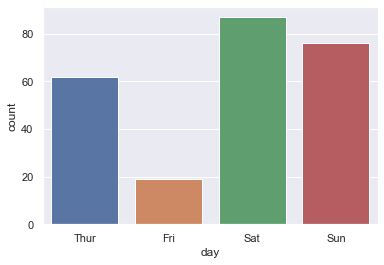

In [104]:
# Cú pháp sns.countplot(data=df, x='tencot')
sns.countplot(data=tips, x='day');

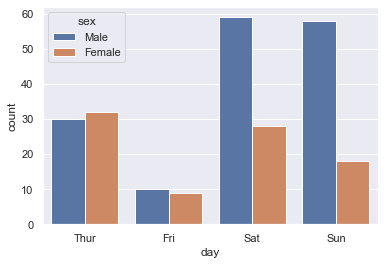

In [110]:
#Chia nhỏ thêm 
# Cú pháp sns.countplot(data=df, x='tencot', hue = 'tencot2')
sns.countplot(data=tips, x='day', hue = 'sex');

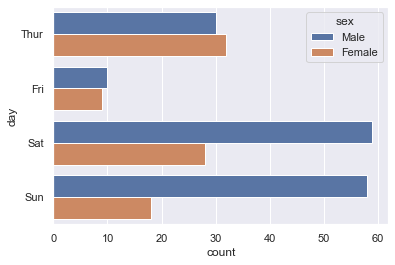

In [111]:
# Vẽ theo chiều ngang, đổi trục x thành y
# Cú pháp sns.countplot(data=df, x='tencot', hue = 'tencot2')
sns.countplot(data=tips, y='day', hue = 'sex');

## Heatmap (bản đồ nhiệt)

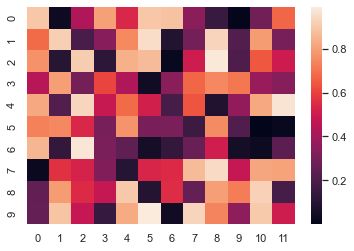

In [118]:
uniform_data = np.random.rand(10, 12) 
# uniform_data
sns.heatmap(uniform_data);

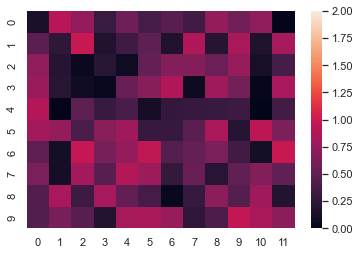

In [121]:
#Thay đổi cường độ màu sắc (intensity)
uniform_data = np.random.rand(10, 12) 
# uniform_data
sns.heatmap(uniform_data, vmin=0, vmax=2);

## Boxplot

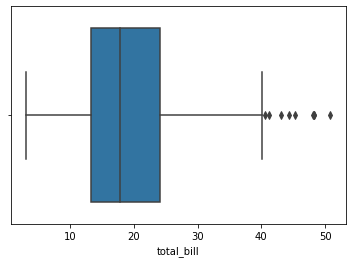

In [8]:
# Cú pháp: sns.boxplot(data=df, x='tencot')
# sns.boxplot(x=df['tencot'])

sns.boxplot(data=tips, x='total_bill');

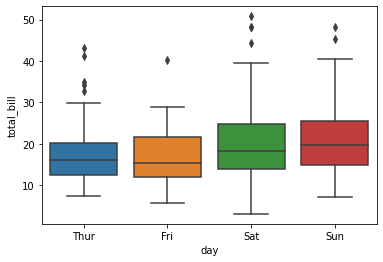

In [12]:
# Thêm 1 trục == chia nhóm dữ liệu
# Cú pháp: sns.boxplot(data=df, x='tencot', y='tencot')

#Ví dụ: Chia thỏ total_bill theo day
sns.boxplot(data=tips, y='total_bill', x='day');

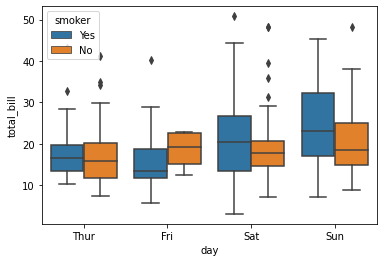

In [14]:
# Thêm 1 trục == chia nhóm dữ liệu
# Cú pháp: sns.boxplot(data=df, x='tencot', y='tencot2', hue='tencot3')

#Ví dụ: Chia thỏ total_bill theo day
sns.boxplot(data=tips, y='total_bill', x='day', hue='smoker');

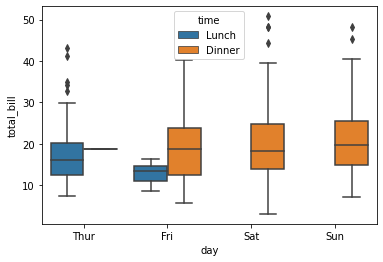

In [15]:
# Thêm 1 trục == chia nhóm dữ liệu
# Cú pháp: sns.boxplot(data=df, x='tencot', y='tencot2', hue='tencot3')

#Ví dụ: Chia thỏ total_bill theo day
sns.boxplot(data=tips, y='total_bill', x='day', hue='time');

## Biểu đồ cặp

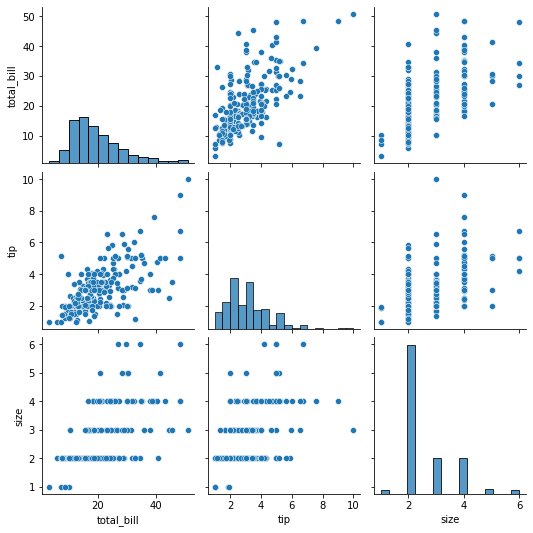

In [17]:
# Cú pháp:
# sns.pairplot(data=df)

#Ví dụ: Tìm mối quan hệ giữa các đặc trưng trong bộ dữ liệu tips
sns.pairplot(data=tips);

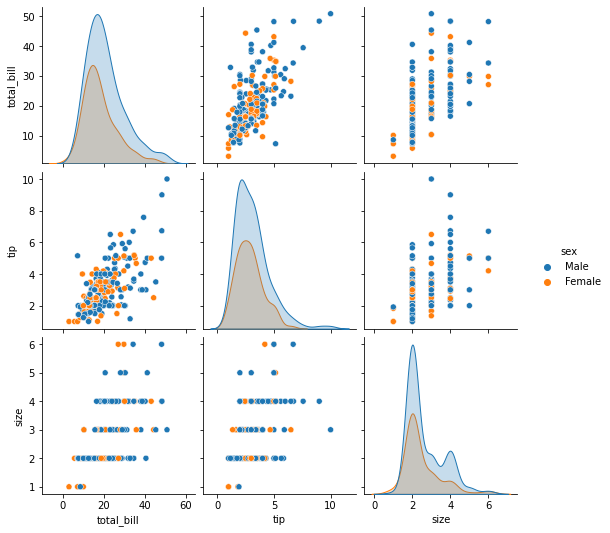

In [22]:
# Chia nhỏ, chia nhóm
# sns.pairplot(data=df, hue='ten cột')

#Ví dụ: Tìm mối quan hệ giữa các đặc trưng trong bộ dữ liệu tips
sns.pairplot(data=tips, hue='sex');